# Handling imbalanced Dataset
If the y variable consists of 800 values as 0 and and 200 values as 1 then it is called as Imbalanced dataset

**Handling can be done in 5 ways :**       
1.Under sampling majority class          
2.Over sampling minority class           
3.SMOTE(Synthetic Minority Over-sampling Technique)           
4.Ensemble method          
5.Focal Loss    

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("D:\programming languages\datasets\Telco customer churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5973,2324-EFHVG,Male,0,No,No,64,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.40,6692.65,No
3340,6015-VVHHE,Female,1,No,No,5,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),83.15,446.05,Yes
1244,2223-KAGMX,Female,0,No,No,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.40,289.3,Yes
6990,0376-OIWME,Male,0,Yes,No,36,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.60,3366.05,No
1628,6267-DCFFZ,Female,1,Yes,No,30,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.05,2627.2,No


In [86]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [87]:
#checking for the percentage of NO s 
517400/df.shape[0]

73.46301292063042

In [88]:
#First of all, drop customerID column as it is of no use
df.drop('customerID',axis='columns',inplace=True)

In [89]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

In [90]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [91]:
#converting into numbers
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [92]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [93]:
df.shape

(7043, 20)

In [94]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [95]:
#Remove rows with space in TotalCharges
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [96]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [97]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Sharath chandra\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [98]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [99]:
df1[df1.Churn=='No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Data visualization**

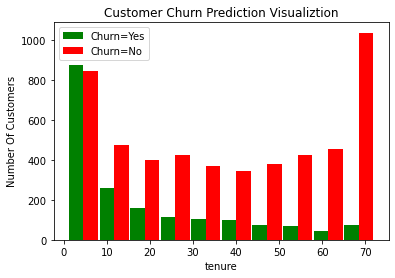

In [100]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

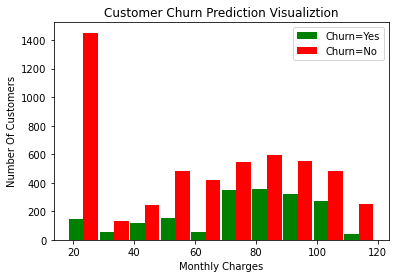

In [101]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [102]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [103]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [104]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Sharath chandra\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [105]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [106]:
#Convert Yes and No to 1 or 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Sharath chandra\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [107]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [108]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [109]:
df1.gender.unique()

array([1, 0], dtype=int64)

**One hot encoding for categorical columns**

In [110]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [111]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2962,1,0,1,1,3,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
5067,1,0,1,1,30,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
1442,1,0,1,1,52,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
688,0,0,0,0,52,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
6602,1,0,1,1,40,1,1,0,1,1,...,0,1,0,1,0,0,0,1,0,0


In [112]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [113]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [114]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train Test Split**

In [115]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [116]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [117]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [37]:
X_train.shape

(5625, 26)

In [38]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


**Build a model (ANN) in tensorflow/keras**

In [119]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [120]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [42]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 3s 6ms/step - loss: 0.5311 - accuracy: 0.7172
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4369 - accuracy: 0.7899
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4276 - accuracy: 0.7940
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4214 - accuracy: 0.7995
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4183 - accuracy: 0.8000
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4160 - accuracy: 0.8016
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4148 - accuracy: 0.8034
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4133 - accuracy: 0.8016
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4125 - accuracy: 0.8028
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4095 - accura

# Handling imbalance in data


# Method 1: Undersampling

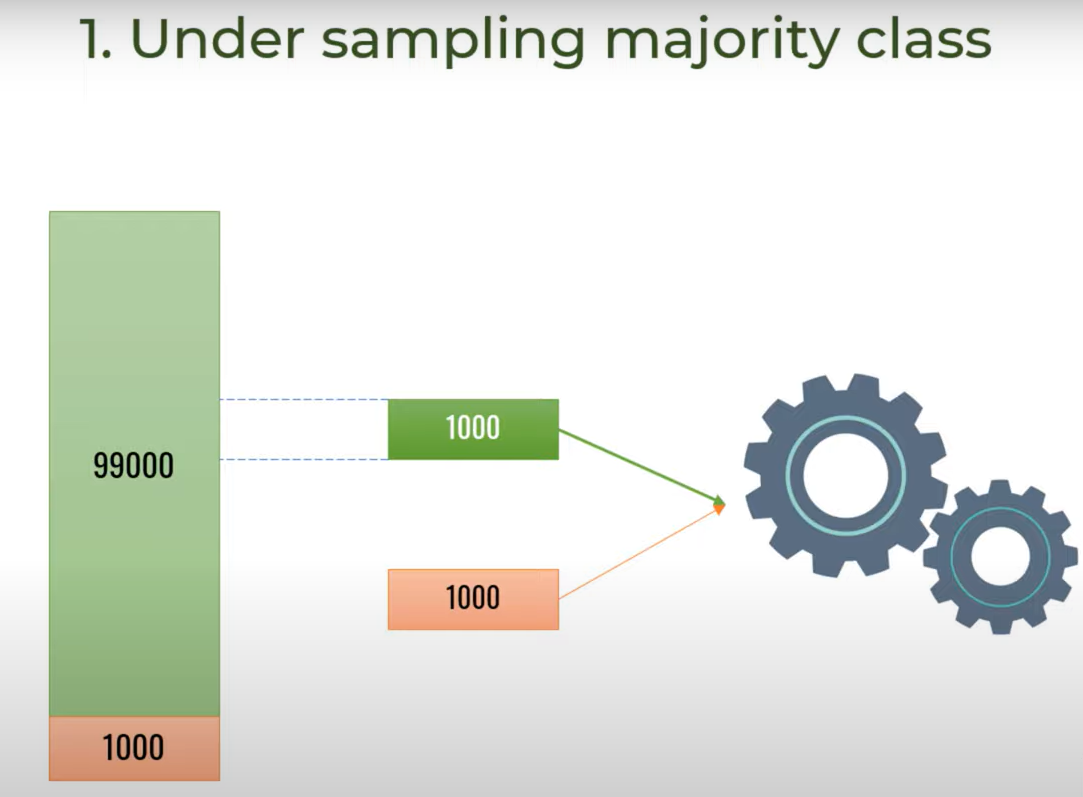

In [43]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [44]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [45]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [46]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

**Printing Classification in the last, Scroll down till the last epoch to watch the classification report**

In [47]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 0.6186 - accuracy: 0.6555
Epoch 2/100
94/94 [==============================] - 1s 5ms/step - loss: 0.5243 - accuracy: 0.7508
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5028 - accuracy: 0.7579
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4939 - accuracy: 0.7605
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4891 - accuracy: 0.7612
Epoch 6/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4852 - accuracy: 0.7652
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4808 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4785 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4759 - accuracy: 0.7739
Epoch 10/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4734 - accuracy: 0.7793
Epoch 11/

94/94 [==============================] - 1s 5ms/step - loss: 0.3910 - accuracy: 0.8187
Epoch 84/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3905 - accuracy: 0.8187
Epoch 85/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3886 - accuracy: 0.8224
Epoch 86/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3895 - accuracy: 0.8177
Epoch 87/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.8217
Epoch 88/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.8197
Epoch 89/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3865 - accuracy: 0.8211
Epoch 90/100
94/94 [==============================] - 1s 5ms/step - loss: 0.3880 - accuracy: 0.8234
Epoch 91/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3866 - accuracy: 0.8204
Epoch 92/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3874 - accuracy: 0.8191
Epoch 93/100


Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

# Method2: Oversampling

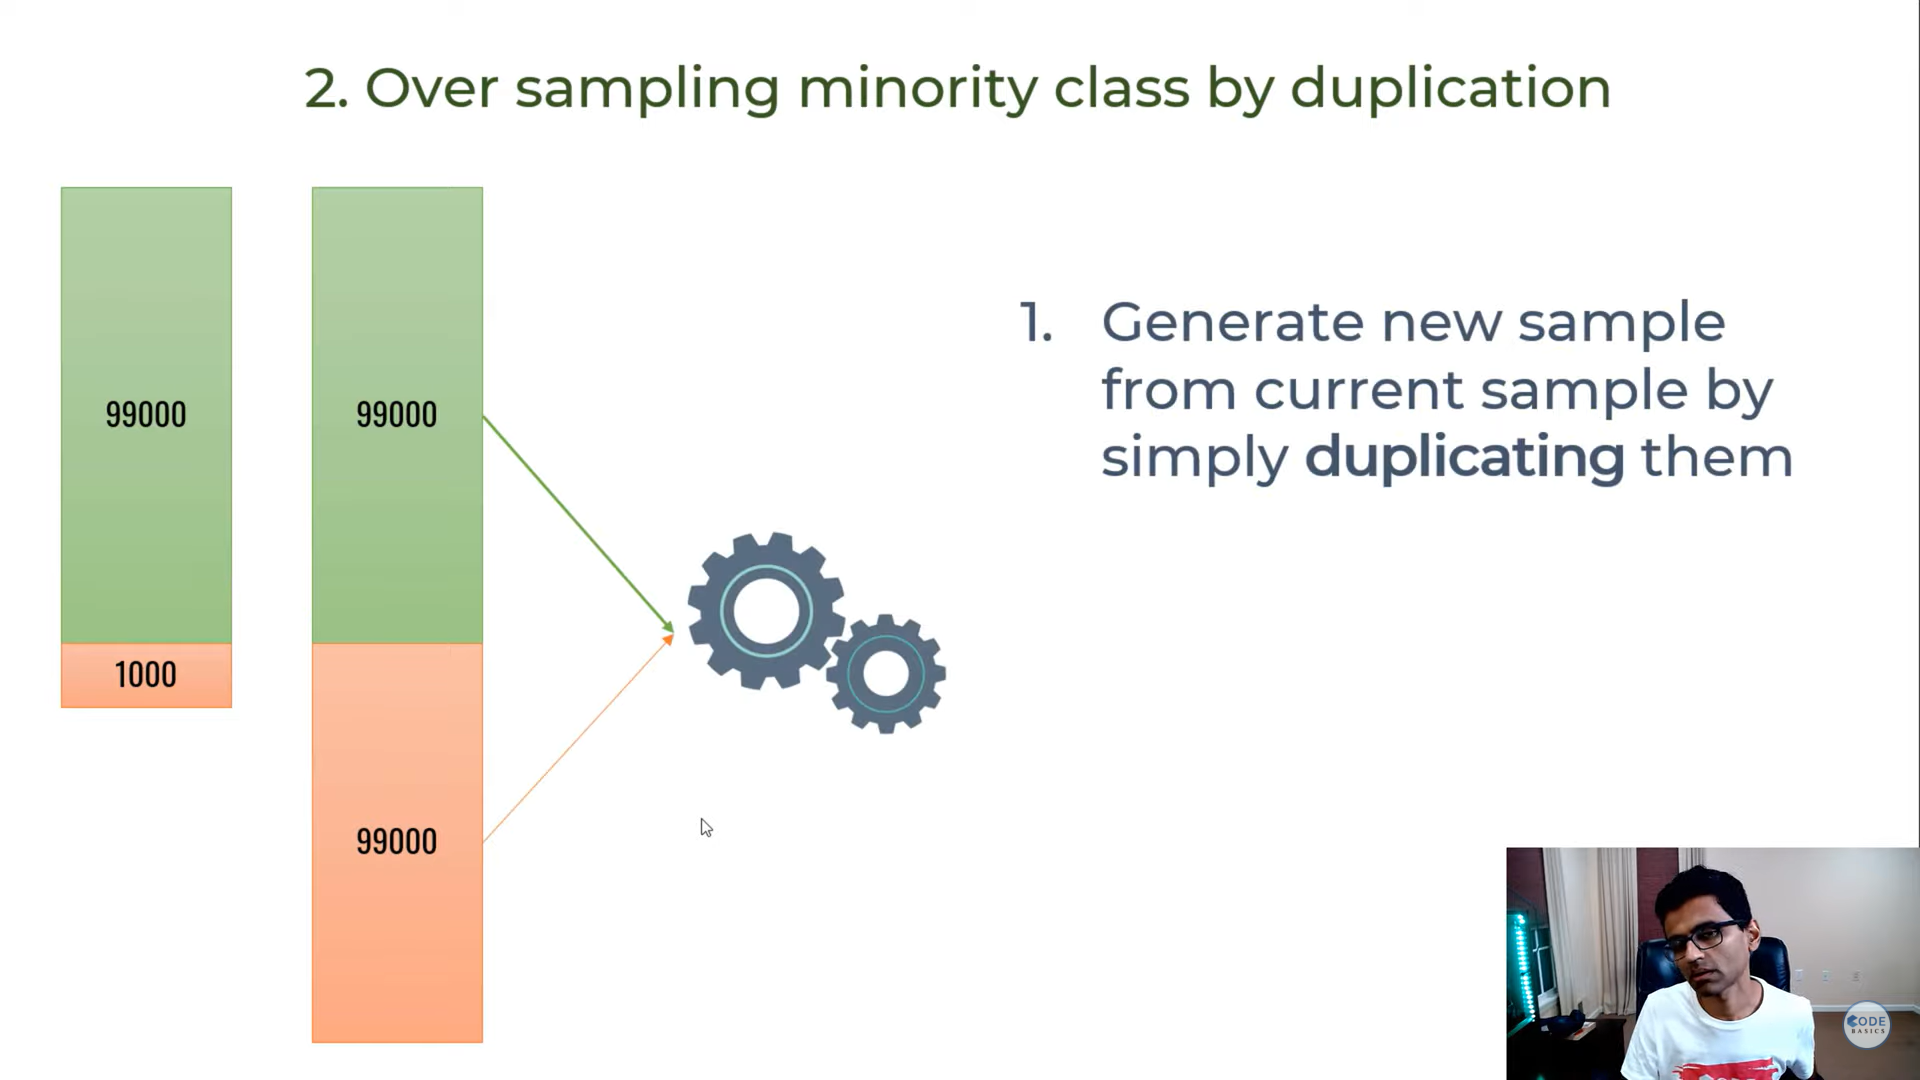

In [48]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [49]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [50]:
# Number of classes in training Data
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [51]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 5ms/step - loss: 0.5436 - accuracy: 0.7278
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4913 - accuracy: 0.7637
Epoch 3/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4836 - accuracy: 0.7696
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4790 - accuracy: 0.7677
Epoch 5/100
259/259 [==============================] - 2s 8ms/step - loss: 0.4749 - accuracy: 0.7718
Epoch 6/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4721 - accuracy: 0.7762
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4704 - accuracy: 0.7751
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4660 - accuracy: 0.7791
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4656 - accuracy: 0.7794
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4627 - accura

Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

# Method3: SMOTE
To install imbalanced-learn library use pip install imbalanced-learn command   
It uses K-Nearest neighbour

In [52]:
!pip install imbalanced-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [121]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [122]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [124]:
# Number of classes in training Data
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [125]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 5ms/step - loss: 0.5449 - accuracy: 0.7202
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4708 - accuracy: 0.7725
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4615 - accuracy: 0.7777
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4562 - accuracy: 0.7821
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4497 - accuracy: 0.7863
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4460 - accuracy: 0.7895
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4409 - accuracy: 0.7926
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4390 - accuracy: 0.7947
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4349 - accuracy: 0.7981
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4319 - accura

MOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.80

# Method4: Use of Ensemble with undersampling

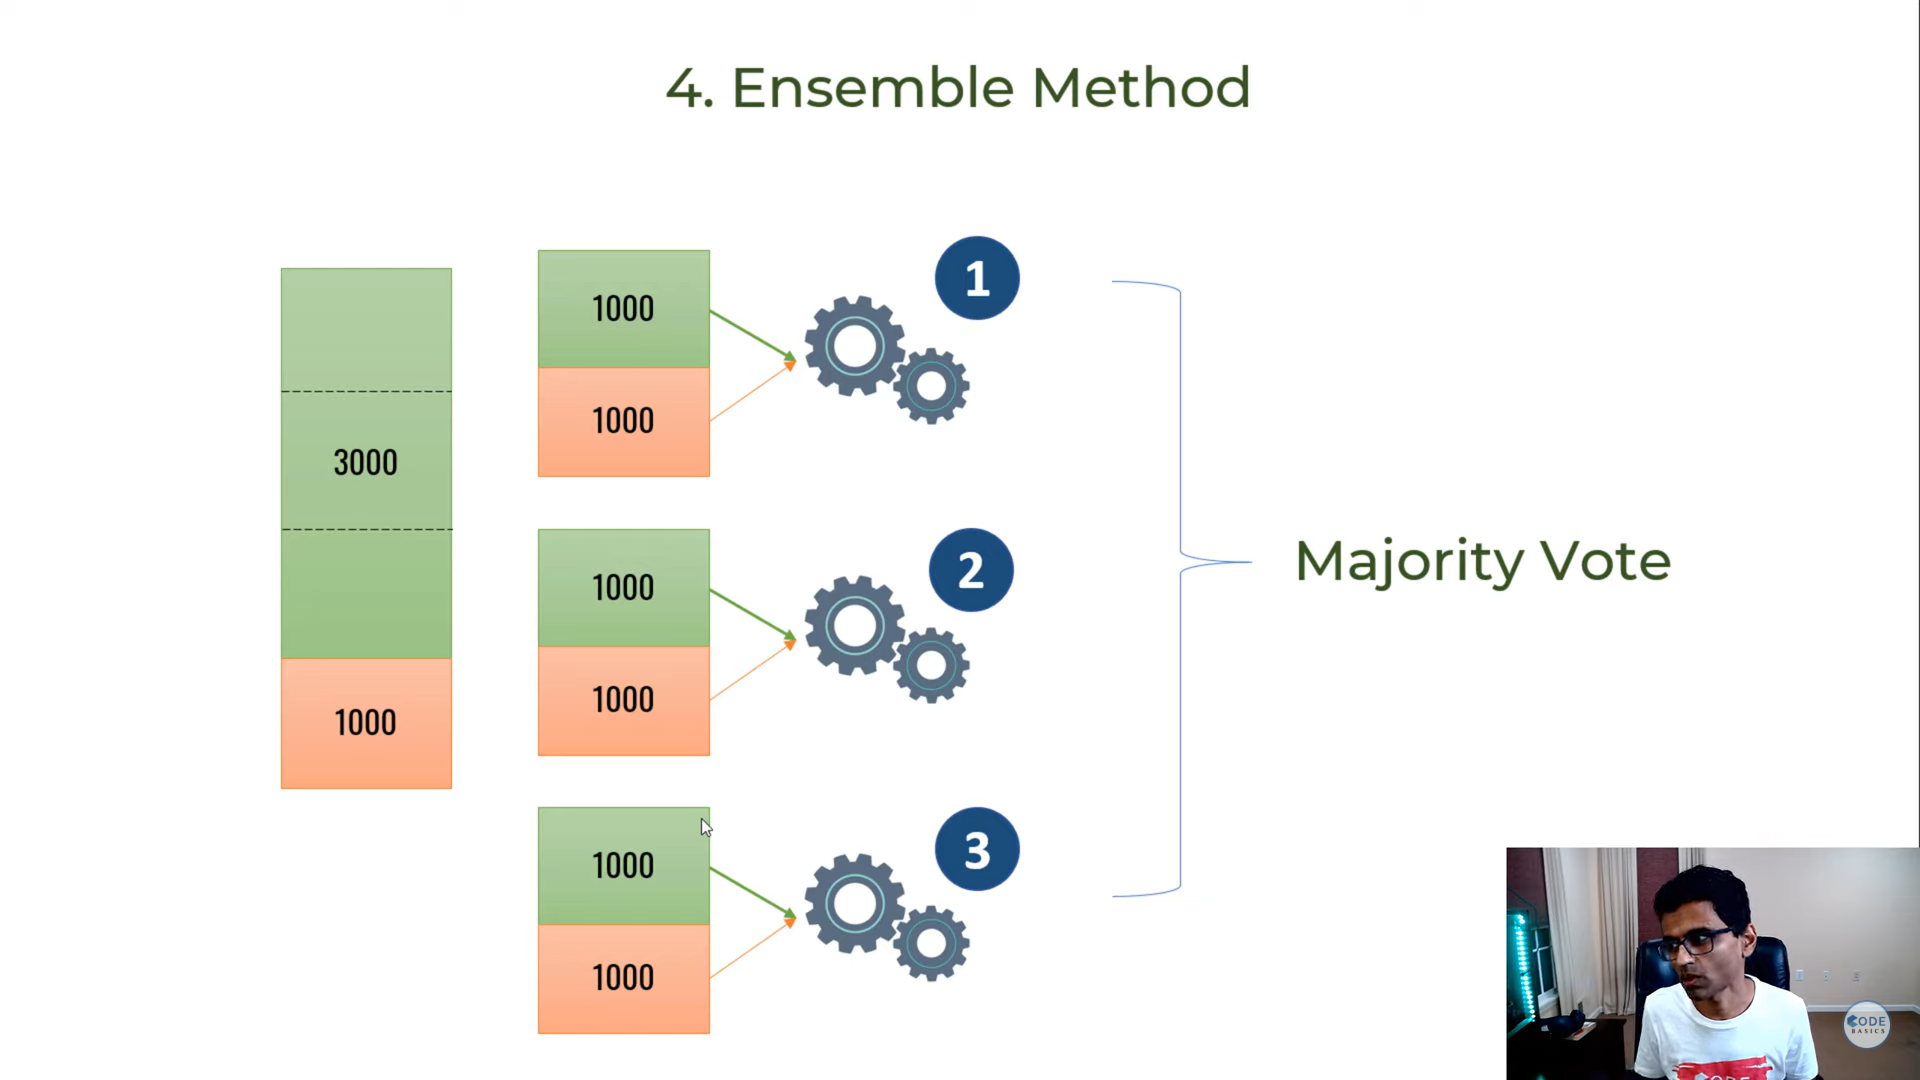

In [55]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [56]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [58]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)


In [59]:
df3 = X_train.copy()
df3['Churn'] = y_train
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [60]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [61]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [62]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 7ms/step - loss: 0.6536 - accuracy: 0.6244
Epoch 2/100
94/94 [==============================] - 1s 8ms/step - loss: 0.5252 - accuracy: 0.7572
Epoch 3/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4948 - accuracy: 0.7652
Epoch 4/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4888 - accuracy: 0.7699
Epoch 5/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4835 - accuracy: 0.7706
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4815 - accuracy: 0.7702
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.7719
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4759 - accuracy: 0.7766
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.7789
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4736 - accuracy: 0.7746
Epoch 11/

94/94 [==============================] - 0s 5ms/step - loss: 0.3956 - accuracy: 0.8274
Epoch 84/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3928 - accuracy: 0.8224
Epoch 85/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3931 - accuracy: 0.8197
Epoch 86/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3914 - accuracy: 0.8211
Epoch 87/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3931 - accuracy: 0.8181
Epoch 88/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3907 - accuracy: 0.8251
Epoch 89/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3897 - accuracy: 0.8288
Epoch 90/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3912 - accuracy: 0.8251
Epoch 91/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3906 - accuracy: 0.8231
Epoch 92/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3929 - accuracy: 0.8244
Epoch 93/100


In [63]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 0.6305 - accuracy: 0.6435
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5295 - accuracy: 0.7482
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5005 - accuracy: 0.7595
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4905 - accuracy: 0.7592
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4846 - accuracy: 0.7625
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4804 - accuracy: 0.7676
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4769 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4739 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4731 - accuracy: 0.7659
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4696 - accuracy: 0.7706
Epoch 11/

94/94 [==============================] - 0s 5ms/step - loss: 0.3677 - accuracy: 0.8334
Epoch 84/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3666 - accuracy: 0.8351
Epoch 85/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3659 - accuracy: 0.8391
Epoch 86/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3661 - accuracy: 0.8385
Epoch 87/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3646 - accuracy: 0.8368
Epoch 88/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3627 - accuracy: 0.8355
Epoch 89/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3617 - accuracy: 0.8378
Epoch 90/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3619 - accuracy: 0.8385
Epoch 91/100
94/94 [==============================] - 1s 5ms/step - loss: 0.3627 - accuracy: 0.8304
Epoch 92/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3607 - accuracy: 0.8391
Epoch 93/100


In [64]:

X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 2s 5ms/step - loss: 0.6089 - accuracy: 0.6748
Epoch 2/100
83/83 [==============================] - 0s 5ms/step - loss: 0.5023 - accuracy: 0.7613
Epoch 3/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4843 - accuracy: 0.7693
Epoch 4/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4757 - accuracy: 0.7753
Epoch 5/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4710 - accuracy: 0.7776
Epoch 6/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4693 - accuracy: 0.7750
Epoch 7/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4668 - accuracy: 0.7787
Epoch 8/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4642 - accuracy: 0.7822
Epoch 9/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4625 - accuracy: 0.7837
Epoch 10/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4625 - accuracy: 0.7860
Epoch 11/

83/83 [==============================] - 0s 5ms/step - loss: 0.3813 - accuracy: 0.8311
Epoch 84/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3824 - accuracy: 0.8349
Epoch 85/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3798 - accuracy: 0.8319
Epoch 86/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3792 - accuracy: 0.8277
Epoch 87/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3794 - accuracy: 0.8311
Epoch 88/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3801 - accuracy: 0.8273
Epoch 89/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3794 - accuracy: 0.8326
Epoch 90/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3788 - accuracy: 0.8349
Epoch 91/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3769 - accuracy: 0.8323
Epoch 92/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3760 - accuracy: 0.8323
Epoch 93/100


In [65]:
len(y_pred1)

1407

In [66]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [67]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.67      0.76      1033
           1       0.46      0.79      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.78      0.70      0.72      1407



f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes

# Focal loss

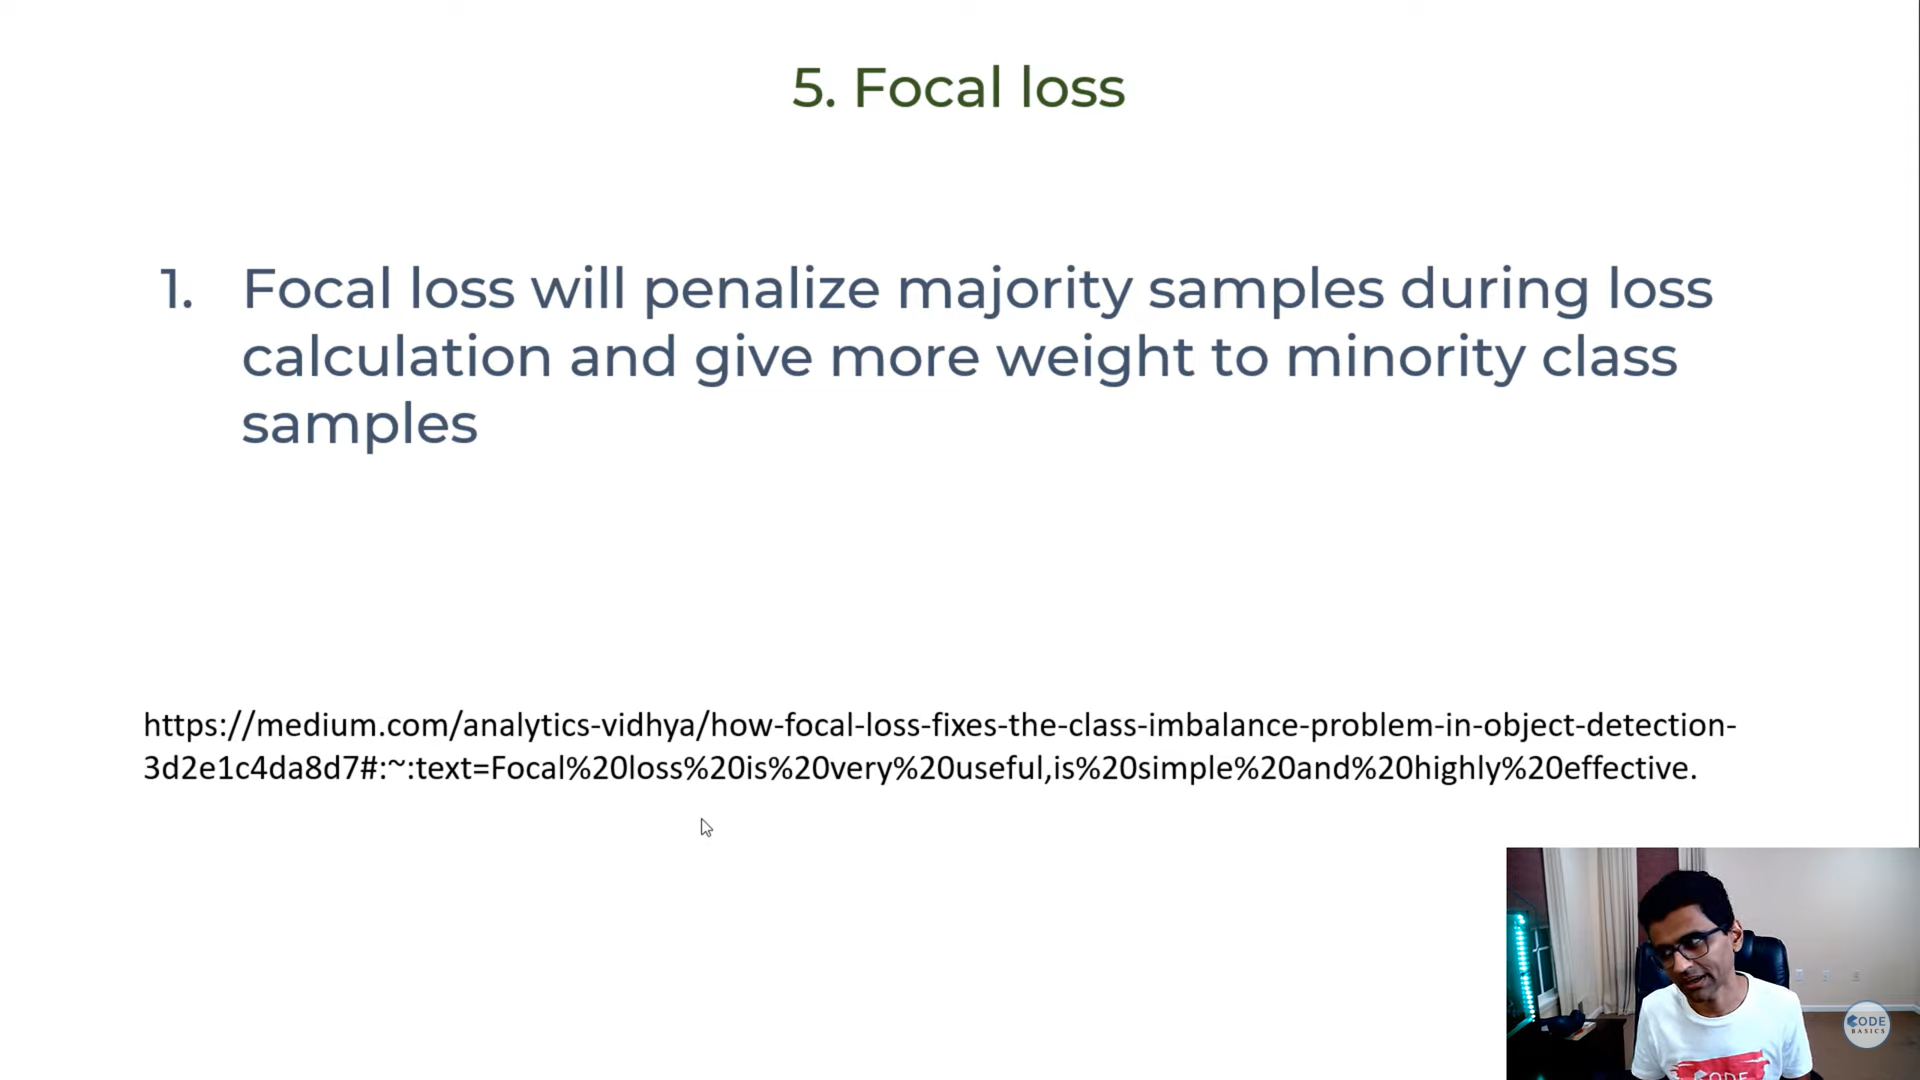

# Excercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('D:\programming languages\datasets\Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#removing unwanted columns
data1=data.drop(['RowNumber','Surname','CustomerId'],axis=1)
data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
for column in data1:
    print(f"{column} : {data1[column].dtype}")

CreditScore : int64
Geography : object
Gender : object
Age : int64
Tenure : int64
Balance : float64
NumOfProducts : int64
HasCrCard : int64
IsActiveMember : int64
EstimatedSalary : float64
Exited : int64


In [5]:
for column in data1:
    print(f"{column} : {data1[column].unique()}")

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [6]:
data1.Gender=data1.Gender.replace({"Female":0,"Male":1})

In [7]:
data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [8]:
data2=pd.get_dummies(data1,columns=['Geography'],drop_first=True)

In [9]:
data2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [11]:
scale_cols=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [12]:
data2[scale_cols]=scaler.fit_transform(data2[scale_cols])
data2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,2,1,0,0.481341,0,0,0
9996,0.332,1,0.229730,1.0,0.228657,1,1,1,0.508490,0,0,0
9997,0.718,0,0.243243,0.7,0.000000,1,0,1,0.210390,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,2,1,0,0.464429,1,1,0


In [13]:
x=data2.drop("Exited",axis=1)
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,0,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,1
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,0,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,2,1,0,0.481341,0,0
9996,0.332,1,0.229730,1.0,0.228657,1,1,1,0.508490,0,0
9997,0.718,0,0.243243,0.7,0.000000,1,0,1,0.210390,0,0
9998,0.844,1,0.324324,0.3,0.299226,2,1,0,0.464429,1,0


In [14]:
y=data2['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [51]:
def get_report(x_train,x_test,y_train,y_test):
    model=LogisticRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3,stratify=y)
len(x_train)

8000

In [19]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [53]:
get_report(x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1593
           1       0.62      0.20      0.30       407

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



# Under sampling

In [40]:
data_exited_0=data2[data2.Exited==0]
data_exited_0.shape

(7963, 12)

In [41]:
data_exited_1=data2[data2.Exited==1]
data_exited_1.shape

(2037, 12)

In [46]:
data_exited_0_under=data_exited_0.sample(data_exited_1.shape[0])
data_exited_0_under.shape

(2037, 12)

In [47]:
df1=pd.concat([data_exited_0_under,data_exited_1])
df1.shape

(4074, 12)

In [48]:
x=df1.drop('Exited',axis=1)
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
7990,0.628,1,0.189189,0.5,0.532909,1,0,0,0.672286,0,1
9271,0.598,0,0.391892,0.8,0.441547,1,1,1,0.357077,0,1
3847,0.522,0,0.256757,0.6,0.000000,2,1,0,0.553909,0,0
1886,0.634,1,0.283784,0.7,0.667829,1,1,1,0.205877,0,1
6639,0.476,1,0.310811,0.6,0.422947,2,1,0,0.993870,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,1,0.324324,0.3,0.605982,1,1,1,0.267193,1,0
9982,0.610,0,0.378378,0.7,0.546617,1,1,0,0.575729,1,0
9991,0.494,0,0.472973,0.4,0.352259,1,1,0,0.346899,0,0
9997,0.718,0,0.243243,0.7,0.000000,1,0,1,0.210390,0,0


In [50]:
y=df1.Exited
y.value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=3)
len(x_train)

3259

In [56]:
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [57]:
get_report(x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       408
           1       0.67      0.68      0.67       407

    accuracy                           0.67       815
   macro avg       0.67      0.67      0.67       815
weighted avg       0.67      0.67      0.67       815



# Over sampling

In [58]:
data_exited_0

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1
6,0.944,1,0.432432,0.7,0.000000,2,1,1,0.050261,0,0,0
8,0.302,1,0.351351,0.4,0.566170,2,0,1,0.374680,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.588,1,0.135135,0.7,0.618021,1,1,0,0.145854,0,0,0
9994,0.900,0,0.148649,0.2,0.000000,2,0,0,0.838890,0,0,0
9995,0.842,1,0.283784,0.5,0.000000,2,1,0,0.481341,0,0,0
9996,0.332,1,0.229730,1.0,0.228657,1,1,1,0.508490,0,0,0


In [59]:
data_exited_1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0
5,0.590,1,0.351351,0.8,0.453394,2,1,0,0.748797,1,0,1
7,0.052,0,0.148649,0.4,0.458540,4,1,0,0.596733,1,1,0
16,0.606,1,0.540541,0.1,0.528513,1,1,0,0.025433,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,1,0.324324,0.3,0.605982,1,1,1,0.267193,1,1,0
9982,0.610,0,0.378378,0.7,0.546617,1,1,0,0.575729,1,1,0
9991,0.494,0,0.472973,0.4,0.352259,1,1,0,0.346899,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,1,0,1,0.210390,1,0,0


In [62]:
data_exited_1_over=data_exited_1.sample(data_exited_0.shape[0],replace=True)
data_exited_1_over.shape

(7963, 12)

In [63]:
df2=pd.concat([data_exited_0,data_exited_1_over],axis=0)
df2.shape

(15926, 12)

In [65]:
x=df2.drop('Exited',axis=1)

In [66]:
y=df2.Exited

In [67]:
y.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3,stratify=y)

In [71]:
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [72]:
get_report(x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1593
           1       0.72      0.70      0.71      1593

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



# SMOTE

In [75]:
from imblearn.over_sampling import SMOTE

In [77]:
x=data2.drop('Exited',axis=1)
y=data2.Exited

In [80]:
smote=SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=3,stratify=y_sm)

In [82]:
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [83]:
get_report(x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1593
           1       0.73      0.72      0.73      1593

    accuracy                           0.73      3186
   macro avg       0.73      0.73      0.73      3186
weighted avg       0.73      0.73      0.73      3186



# Ensemble sampling

In [190]:
x=data2.drop('Exited',axis=1)
x.shape

(10000, 11)

In [191]:
y=data2.Exited
y.shape

(10000,)

In [192]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3,stratify=y)

In [193]:
data3=x_train
test_sample=y_test

In [158]:
data3['Exited']=y_train
data3

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Exited
8510,0.400,0,0.297297,0.8,0.599807,1,0,0,0.832363,0,0,1
6141,0.444,1,0.081081,0.1,0.000000,2,1,1,0.757319,0,0,0
2037,0.636,0,0.081081,0.7,0.693358,1,0,0,0.532278,0,1,1
7883,0.402,0,0.364865,0.6,0.000000,2,1,1,0.255684,0,0,0
4377,0.738,0,0.256757,0.9,0.404370,1,1,0,0.128972,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6940,0.450,1,0.378378,0.1,0.000000,2,1,1,0.329965,0,0,0
4706,1.000,1,0.337838,0.4,0.642717,1,1,1,0.700367,0,0,0
8243,0.950,1,0.148649,0.3,0.593364,2,0,1,0.355940,0,0,0
8408,0.958,1,0.243243,0.4,0.326012,2,1,0,0.450520,1,0,0


In [159]:
data_exited_0=data3[data3.Exited==0]
data_exited_1=data3[data3.Exited==1]

In [160]:
len(data_exited_0),len(data_exited_1)

(6370, 1630)

In [161]:
data_exited_0

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Exited
6141,0.444,1,0.081081,0.1,0.000000,2,1,1,0.757319,0,0,0
7883,0.402,0,0.364865,0.6,0.000000,2,1,1,0.255684,0,0,0
3191,0.480,1,0.189189,0.5,0.000000,2,1,0,0.296220,0,0,0
2249,0.824,1,0.229730,0.9,0.000000,2,1,1,0.215341,0,0,0
3353,0.316,0,0.175676,0.7,0.000000,2,1,1,0.030561,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6940,0.450,1,0.378378,0.1,0.000000,2,1,1,0.329965,0,0,0
4706,1.000,1,0.337838,0.4,0.642717,1,1,1,0.700367,0,0,0
8243,0.950,1,0.148649,0.3,0.593364,2,0,1,0.355940,0,0,0
8408,0.958,1,0.243243,0.4,0.326012,2,1,0,0.450520,1,0,0


In [162]:
data_exited_1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Exited
8510,0.400,0,0.297297,0.8,0.599807,1,0,0,0.832363,0,0,1
2037,0.636,0,0.081081,0.7,0.693358,1,0,0,0.532278,0,1,1
4377,0.738,0,0.256757,0.9,0.404370,1,1,0,0.128972,0,0,1
3409,0.496,0,0.378378,0.7,0.525189,1,0,0,0.924932,1,0,1
3570,0.648,1,0.378378,0.2,0.696303,1,1,0,0.450934,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2617,0.684,1,0.364865,0.6,0.607007,4,0,1,0.540198,1,0,1
4712,0.248,1,0.486486,0.3,0.000000,1,1,0,0.542040,0,0,1
1955,0.430,0,0.540541,0.3,0.433994,3,0,1,0.679385,1,0,1
7227,0.708,0,0.081081,0.2,0.000000,1,1,0,0.177960,0,1,1


In [163]:
def get_ensembled_df(df_0,df_1,start,end):
    df_exit_0=data_exited_0[start:end]
    df_exit_1=df_1
    new_df=pd.concat([df_exit_0,df_exit_1],axis=0)
    return new_df

In [164]:
df1=get_ensembled_df(data_exited_0,data_exited_1,0,data_exited_1.shape[0])

In [165]:
df1.shape

(3260, 12)

In [166]:
df1.Exited.value_counts()

0    1630
1    1630
Name: Exited, dtype: int64

In [167]:
def get_report(x_train,x_test,y_train,y_test):
    model=LogisticRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return y_pred

In [168]:
x_train,x_test,y_train,y_test=train_test_split(df1.drop('Exited',axis=1),df1.Exited,test_size=0.2,random_state=3,stratify=df1.Exited)

In [169]:
y_train.value_counts()

0    1304
1    1304
Name: Exited, dtype: int64

In [170]:
y_pred1=get_report(x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       326
           1       0.70      0.65      0.68       326

    accuracy                           0.69       652
   macro avg       0.69      0.69      0.69       652
weighted avg       0.69      0.69      0.69       652



In [171]:
df2=get_ensembled_df(data_exited_0,data_exited_1,data_exited_1.shape[0],2*data_exited_1.shape[0])

In [172]:
df2.shape

(3260, 12)

In [173]:
df2.Exited.value_counts()

0    1630
1    1630
Name: Exited, dtype: int64

In [174]:
x_train,x_test,y_train,y_test=train_test_split(df2.drop('Exited',axis=1),df2.Exited,test_size=0.2,random_state=3,stratify=df2.Exited)

In [175]:
y_train.value_counts()

0    1304
1    1304
Name: Exited, dtype: int64

In [176]:
y_pred2=get_report(x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       326
           1       0.69      0.66      0.68       326

    accuracy                           0.68       652
   macro avg       0.68      0.68      0.68       652
weighted avg       0.68      0.68      0.68       652



In [177]:
df3=get_ensembled_df(data_exited_0,data_exited_1,2*data_exited_1.shape[0],3*data_exited_1.shape[0])

In [178]:
df3.shape

(3260, 12)

In [200]:
x_train,x_test,y_train,y_test=train_test_split(df3.drop('Exited',axis=1),df3.Exited,test_size=0.2,random_state=3,stratify=df3.Exited)

In [201]:
y_train.value_counts()

0    1304
1    1304
Name: Exited, dtype: int64

In [202]:
y_test.shape

(652,)

In [181]:
y_pred3=get_report(x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       326
           1       0.73      0.66      0.69       326

    accuracy                           0.71       652
   macro avg       0.71      0.71      0.71       652
weighted avg       0.71      0.71      0.71       652



In [184]:
y_pred_final=y_pred1+y_pred2+y_pred3
y_pred_final

array([3, 1, 2, 0, 2, 3, 1, 3, 1, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 1, 0, 3,
       1, 3, 1, 3, 0, 1, 3, 0, 3, 3, 2, 3, 0, 1, 2, 1, 3, 1, 1, 3, 3, 1,
       0, 1, 0, 1, 3, 1, 3, 3, 0, 0, 3, 3, 0, 3, 1, 3, 0, 1, 3, 1, 0, 3,
       3, 3, 3, 3, 0, 3, 3, 0, 1, 0, 3, 3, 0, 3, 3, 3, 0, 2, 1, 0, 0, 2,
       3, 3, 2, 3, 1, 0, 1, 3, 3, 0, 0, 2, 1, 3, 3, 0, 3, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 1, 1, 3, 1, 3, 0, 0, 1, 3, 2, 1, 2, 1, 3, 0, 3, 3, 0,
       2, 2, 3, 0, 3, 0, 3, 1, 0, 3, 3, 0, 1, 3, 0, 3, 0, 0, 3, 1, 0, 1,
       3, 3, 0, 1, 3, 1, 3, 0, 0, 3, 1, 3, 3, 3, 0, 2, 2, 1, 0, 0, 3, 0,
       1, 0, 0, 0, 0, 1, 3, 3, 0, 0, 0, 1, 1, 0, 1, 0, 3, 0, 3, 0, 1, 2,
       3, 0, 0, 3, 0, 3, 0, 3, 1, 1, 0, 0, 2, 1, 3, 1, 1, 0, 1, 3, 0, 0,
       1, 2, 0, 3, 2, 0, 2, 0, 1, 3, 0, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 3,
       3, 0, 2, 1, 3, 0, 3, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 3, 1,
       3, 0, 0, 1, 1, 0, 0, 1, 3, 1, 0, 3, 0, 2, 0, 0, 3, 0, 3, 0, 3, 3,
       3, 3, 0, 0, 3, 0, 3, 3, 1, 2, 0, 1, 0, 3, 0,

In [187]:
y_pred=[1 if i>1 else 0 for i in y_pred_final]

In [198]:
len(y_pred)

652

In [203]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       326
           1       0.79      0.65      0.71       326

    accuracy                           0.74       652
   macro avg       0.75      0.74      0.74       652
weighted avg       0.75      0.74      0.74       652

